# MSE 501 2018 HW 2 

You are handed the attached XRD pattern (mystery.png). You are asked to determine what metal you are looking at. Hint: it may be more than one type of metal.


1. Determine what this structure can be in terms of crystal structure(s) and lattice parameter(s)

2. Doing some web sleuthing, hypothesize
 what [different] atom[s] might make up this/these structure[s]

3. Estimate the crystallite size of these structures

4. You are given a second pattern (mystery2.png). Using your previous analysis, hypothesize what this might be.

You may use pylattice to check your work but you do not have to and you do not need to.  

Datasets for both plots are also provided. You will also find them in your notebooks under data_sets, and there is a notebook in your folder that shows you how to open and plot data.


The X-ray source used is copper k_alpha @ 1.5405 Å



## Solution
See [here](http://pubs.acs.org/doi/pdf/10.1021/ed074p115)
An unknown sample has peaks at the following $2\theta$, found using a copper source.

In [1]:
import sys
sys.path.append("/pithy/code")
sys.path.append("/notebooks/class_folder/Libraries/pylattice/")
from pithy import * 
import pandas as pd
import peakutils
from lattice import *
import libruff
%matplotlib inline

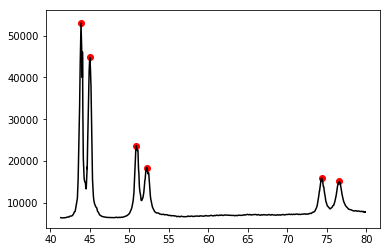

In [7]:
#open data file
df = pd.read_csv("/notebooks/class_folder/Datasets/hw2_mystery.dat")
plot(df['2Theta'],df['Count'],'k')
indices = peakutils.indexes(df['Count'], thres=.1, min_dist=20)#see 
for i in indices: scatter(df.iloc[i]['2Theta'],df.iloc[i]['Count'],color="red")
    


So we have peaks identified at

In [8]:
print df.iloc[indices]['2Theta']

44     43.875511
107    45.000061
187    50.865305
227    52.226913
401    74.371325
430    76.588090
Name: 2Theta, dtype: float64


Let's assume at first it's a subpic structure, so we can use a structure factor of the form:

$$\sin^2 (\theta) = \lambda^2\frac{h^2+k^2+l^2}{4a^2}$$

where

$h^2+k^2+l^2$ must be an integer number


$$\frac{\sin^2 (\theta) 4a^2}{\lambda^2} = h^2+k^2+l^2$$

We have  more unknowns than equations, so we have to guess and check

In [4]:
arr =  array(df.iloc[indices]['2Theta'])
ang_to_rad = 57.2958
#conver to radians
arr = arr/ang_to_rad

for a in arr: print '2theta=',a,'sin^2(theta)=',sin(a/2)**2

#try normalizing to first peak....
conv = sin(arr/2)**2

conv = conv/conv[0] #ratio of the different peaks
print conv


2theta= 0.7657718555408947 sin^2(theta)= 0.13957619795782564
2theta= 0.7853989390862856 sin^2(theta)= 0.14644688365425104
2theta= 0.8877667358270589 sin^2(theta)= 0.18442706898054248
2theta= 0.9115312618237288 sin^2(theta)= 0.19373195325948694
2theta= 1.2980240192090866 sin^2(theta)= 0.36529886118677024
2theta= 1.3367138630335904 sin^2(theta)= 0.38402471476263883
[1.         1.04922534 1.3213361  1.38800136 2.61720026 2.75136248]


Not great yet, so let's take another look at the data


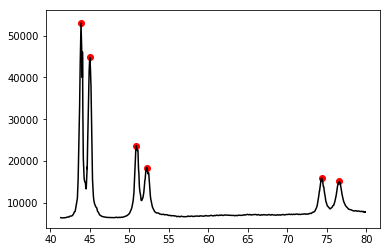

In [5]:
plot(df['2Theta'],df['Count'],'k')
indices = peakutils.indexes(df['Count'], thres=.1, min_dist=20)#see 
for i in indices: scatter(df.iloc[i]['2Theta'],df.iloc[i]['Count'],color="red")
    


Note that it looks like three pairs of peaks at similar ratios. What if these are two different materials with similar structures? Let's separate the 1,3 and 5th peak from the 2nd,4th, and 6th.

In [6]:
arr =  array(df.iloc[indices]['2Theta'])
arr1 = array([arr[0],arr[2],arr[4]])
arr2 = array([arr[1],arr[3],arr[5]])

arr1 = arr1/ang_to_rad
arr2 = arr2/ang_to_rad

And now we can look for matches separately:

In [7]:
conv1 = sin(arr1/2)**2
conv1 = conv1/conv1[0] #ratio of the different peaks
guessn = 1
print "guess 1 = ", conv1*guessn
conv2 = sin(arr2/2)**2
conv2 = conv2/conv2[0] #ratio of the different peaks
print "guess 2 = ", conv2*guessn


guess 1 =  [1.         1.3213361  2.61720026]
guess 2 =  [1.         1.32288205 2.62227987]


This seems to have been reasonable, the ratio of the two structures seems to be the same. But what is it? We're stil lacking an interger multiple. Let's multiply through to see if we can fix that


In [8]:
conv1 = sin(arr1/2)**2
conv1 = conv1/conv1[0] #ratio of the different peaks
guessn = 3
print "guess 1 = ", conv1*guessn
conv2 = sin(arr2/2)**2
conv2 = conv2/conv2[0] #ratio of the different peaks
print "guess 2 = ", conv2*guessn

# This 


guess 1 =  [3.         3.9640083  7.85160077]
guess 2 =  [3.         3.96864614 7.8668396 ]


This isn't great, but we can try working with it.

- $1^2+1^2+1^2 = 3$  All odd
- $2^2+2^2+0^2 = 8$  All even
- $3^2+1^2+1^2 = 11$ All odd
- $4^2+0^2+0^2 = 16$ All even
- $3^2+3^2+1^2 = 19$ All odd
- $4^2+2^2+2^2 = 24$ All odd

this seems to be fcc. let's test



In [9]:
l_cu = 1.5405 #our copper source

miller = [[1,1,1],[2,0,0],[2,2,0]]  #our available peaks
print arr1
for i in range(len(arr1)): #sweep the range
    theta = arr1[i]/2 #match theta
    summer = 0
    for j in miller[i]: summer += j**2
    a1 = sqrt(l_cu**2*(summer)/(4*sin(theta)**2))

    print "a1 = ", a1

    
print arr2
for i in range(len(arr2)): #sweep the range
    theta = arr2[i]/2 #match theta
    summer = 0
    for j in miller[i]: summer += j**2
    a2 = sqrt(l_cu**2*(summer)/(4*sin(theta)**2))

    print "a2 = ", a2


[0.76577186 0.88776674 1.29802402]
a1 =  3.570973705678371
a1 =  3.5871486209837755
a1 =  3.604562343257125
[0.78539894 0.91153126 1.33671386]
a2 =  3.4861997476725333
a2 =  3.49994382662765
a2 =  3.5155810340164924


So there is some error in the fit, but is seems pretty close to FCC. Let's try to fit to real parameters.

From [here](http://periodictable.com/Properties/A/LatticeConstants.html), Copper seems to be ~3.61A (a1) , and Nickel ~3.52A (a2). 


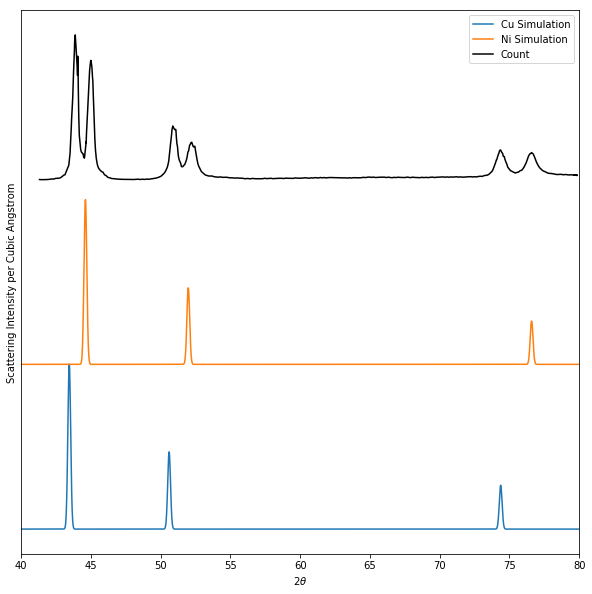

In [10]:
figure(figsize=(10,10))
#Plot Crystal 1
param = a1
lattice = FCC(param)
basis = Basis([('Cu',[0,0,0]),('Cu',[0.5,0.5,0])],l_const=a1)
crystal = lattice + basis

# Plot a simulated XRD with copper radiation
scattering_data = powder_XRD(crystal, l_cu)
angles, values = spectrumify(scattering_data)
plot(angles,values/max(values),label="Cu Simulation")


#Plot Crystal 2
param = a2
lattice = FCC(param)
basis = Basis([('Ni',[0,0,0]),('Ni',[0.5,0.5,0])],l_const=a1)
crystal = lattice + basis


# Plot a simulated XRD with copper radiation
scattering_data = powder_XRD(crystal, l_cu)
angles, values = spectrumify(scattering_data)
plot(angles,values/max(values)+1,label="Ni Simulation")

#Plot original data
plot(df['2Theta'],df['Count']/max(df['Count'])+2,'k')
indices = peakutils.indexes(df['Count'], thres=.1, min_dist=20)#see 


# Add some more info to the plot
xlabel(r'$2\theta$')
ylabel(r'Scattering Intensity per Cubic Angstrom')
yticks([])
xlim(40,80)
legend()
show()



So this fit is a good hypothesis, but it's not a smoking gun because the there is still a bit of slop on the peaks, indicating an experimental scan that is lacking. At this point we'd also do xray spectroscopy to determine what the chemistry is, and we'd confirm that it is indeed a mixture of copper and nickel powder.

To estimate the crystal size, we apply the Scherrer equation to the first peak.

The second structure is then, likely, an alloy of Nickel and Copper